In [448]:
#https://www.kaggle.com/tunguz/big-five-personality-test

In [449]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from random import sample
import seaborn as sns
sns.set_theme()
#plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,10)
import warnings
warnings.filterwarnings("ignore")

In [450]:
data = pd.read_csv('data-final-clean.csv')


# Exploratory Data Analysis

In [451]:
data.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB


In [452]:
# draw 10,000 samples

data_sample = data.sample(10000)
data_sample_analysis = data.sample(10000, random_state=1)

In [453]:
data_sample.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
464392,5.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,3.0,1.0,...,1.0,3.0,3.0,5.0,5.0,5.0,4.0,3.0,5.0,US
282535,1.0,4.0,2.0,4.0,2.0,4.0,1.0,4.0,1.0,4.0,...,4.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,US
444155,4.0,1.0,5.0,1.0,3.0,1.0,5.0,3.0,4.0,3.0,...,1.0,5.0,1.0,4.0,1.0,4.0,4.0,4.0,4.0,US
455756,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,4.0,2.0,...,1.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,US
275293,1.0,5.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,...,3.0,1.0,4.0,2.0,5.0,3.0,2.0,2.0,2.0,US


In [454]:
# compute the sum of every personality trait and assign to new dataframe

data_sample['extraversion']=data_sample.loc[:,'EXT1':'EXT10'].sum(axis=1)
data_sample['emotional_stability']=data_sample.loc[:,'EST1':'EST10'].sum(axis=1)
data_sample['aggreableness']=data_sample.loc[:,'AGR1':'AGR10'].sum(axis=1)
data_sample['conscientiousness']=data_sample.loc[:,'CSN1':'CSN10'].sum(axis=1)
data_sample['openness']=data_sample.loc[:,'OPN1':'OPN10'].sum(axis=1)

data_sum = data_sample.loc[:,'country':'openness']

In [455]:
data_sum.head()

,country,extraversion,emotional_stability,aggreableness,conscientiousness,openness
464392,US,30.0,24.0,32.0,29.0,39.0
282535,US,27.0,37.0,30.0,33.0,31.0
444155,US,30.0,41.0,37.0,34.0,31.0
455756,US,34.0,22.0,24.0,34.0,32.0
275293,US,32.0,19.0,26.0,28.0,27.0


In [456]:
# standardize all the data

# scaler= MinMaxScaler()
# x = data_sum['extraversion'].values.reshape(-1,1)
# data_sum['extraversion'] = scaler.fit_transform(x)

# x = data_sum['emotional_stability'].values.reshape(-1,1)
# data_sum['emotional_stability'] = scaler.fit_transform(x)

# x = data_sum['aggreableness'].values.reshape(-1,1)
# data_sum['aggreableness'] = scaler.fit_transform(x)

# x = data_sum['conscientiousness'].values.reshape(-1,1)
# data_sum['conscientiousness'] = scaler.fit_transform(x)

# x = data_sum['openness'].values.reshape(-1,1)
# data_sum['openness'] = scaler.fit_transform(x)

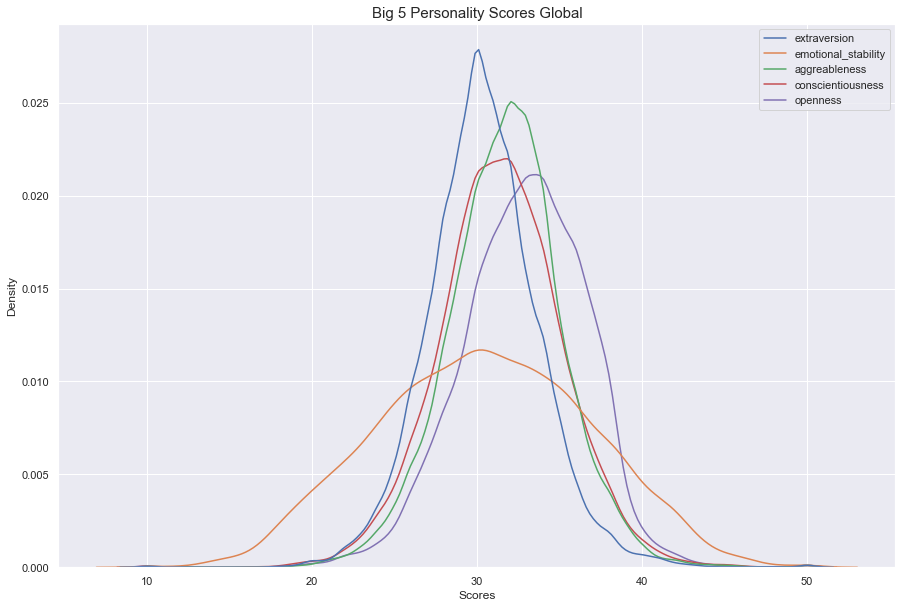

In [457]:
# visualize the distribution of every personality trait

sns.kdeplot(data= data_sum);
plt.xlabel('Scores');
plt.ylabel('Density');
#plt.legend(['Extraversion','Emotional Stability','Agreeableness','Conscientiousness','Openness']);
plt.title('Big 5 Personality Scores Global', fontsize=15);

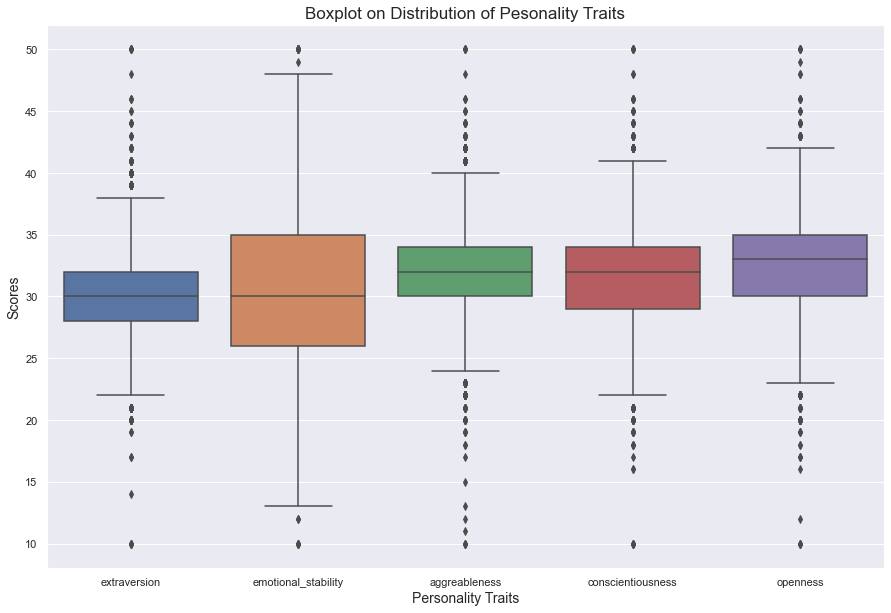

In [386]:
# use boxplot to visualize the distribution of each personality trait

sns.boxplot(data= data_sum);
plt.xlabel('Personality Traits', fontsize=14);
plt.ylabel ('Scores', fontsize=14);
plt.title('Boxplot on Distribution of Pesonality Traits', fontsize=17);

In [387]:
# explore personality data for asia

asia_list = ['IN','PH','MY','SG','CH','HK','VN','KR','LK','MM','TH','ID','KH']

asia = []
for i in asia_list:
    x =data_sum[data_sum['country']== i]
    asia.append(x)
asia = pd.concat(asia)

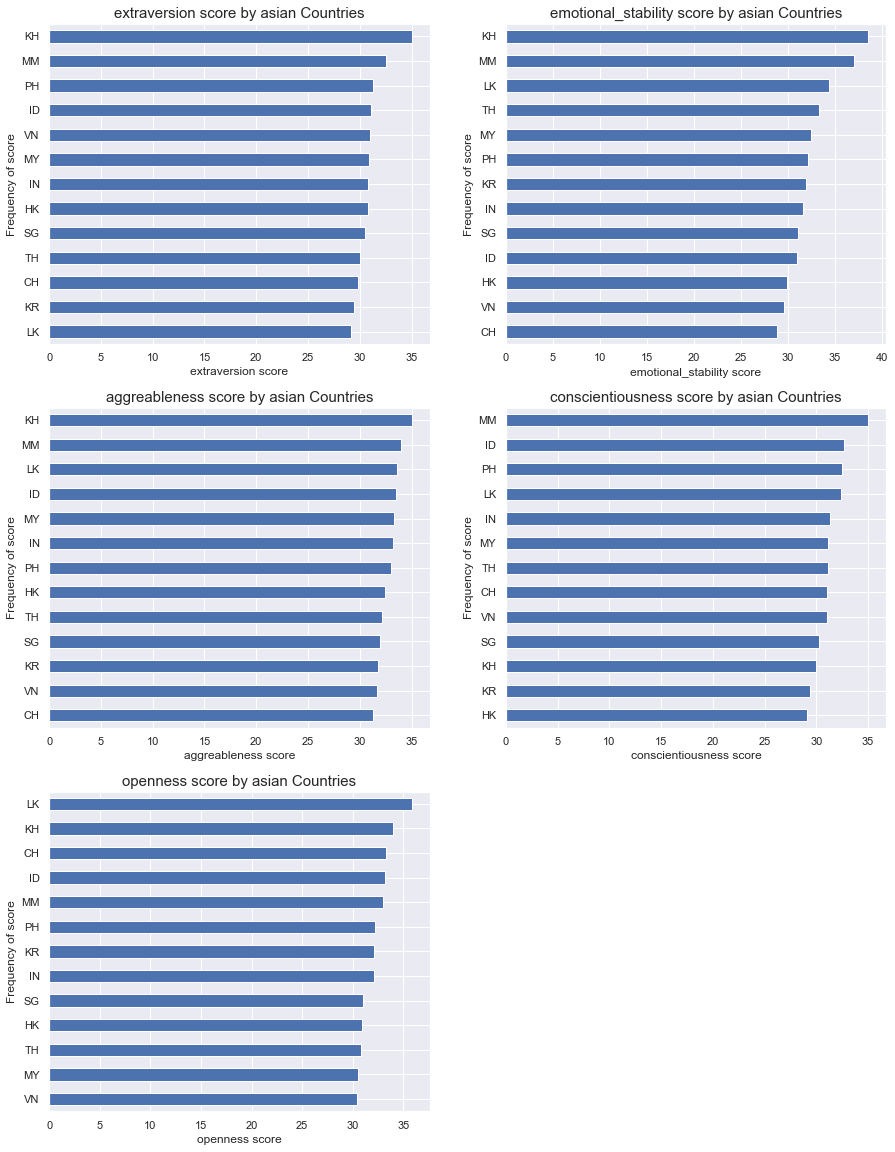

In [388]:
# visualize average personality trait score for asia

fig=plt.gcf()
fig.set_size_inches(15,20)

traits = ['extraversion','emotional_stability','aggreableness','conscientiousness','openness']
fig_number = [1,2,3,4,5]
for i,j in zip(traits, fig_number):
    
    plt.subplot(3,2,j)
    asia.groupby('country')[i].mean().sort_values().plot(kind='barh')
    plt.xlabel(f'{i} score');
    plt.ylabel('Frequency of score');
    plt.title(f'{i} score by asian Countries', fontsize=15);
    
plt.tight_layout
plt.show()

#sns.kdeplot(data=asia, x='ext_sum', hue='country', palette='bright');


In [389]:
# create a dataframe for developed countries

dev_list = ['US','GB','AU','JP','CA','DE','IT','FR']

dev = []
for i in dev_list:
    x =data_sum[data_sum['country']== i]
    dev.append(x)
dev = pd.concat(dev)

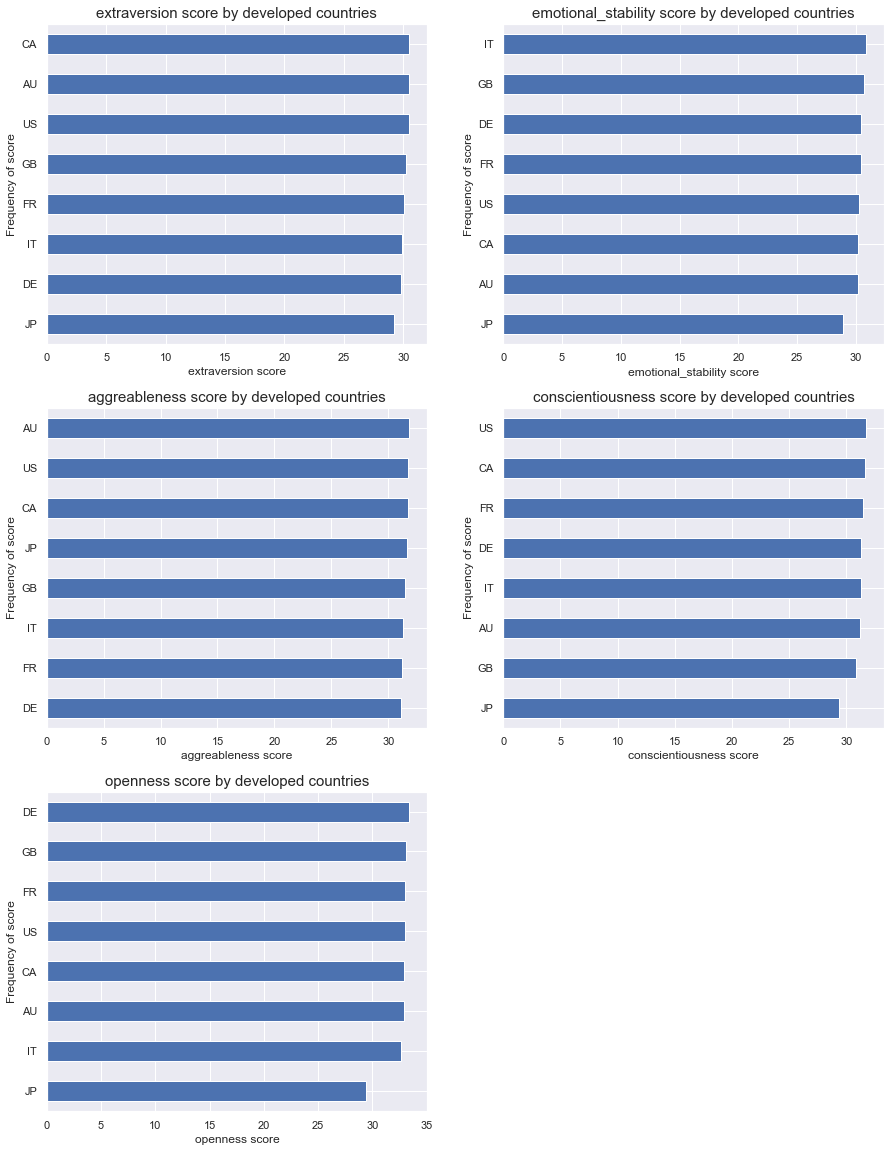

In [390]:
# visualize average personality traits scores for developed countries

fig=plt.gcf()
fig.set_size_inches(15,20)

traits = ['extraversion','emotional_stability','aggreableness','conscientiousness','openness']
fig_number = [1,2,3,4,5]
for i,j in zip(traits, fig_number):
    
    plt.subplot(3,2,j)
    dev.groupby('country')[i].mean().sort_values().plot(kind='barh')
    plt.xlabel(f'{i} score');
    plt.ylabel('Frequency of score');
    plt.title(f'{i} score by developed countries', fontsize=15);
    
plt.tight_layout
plt.show()


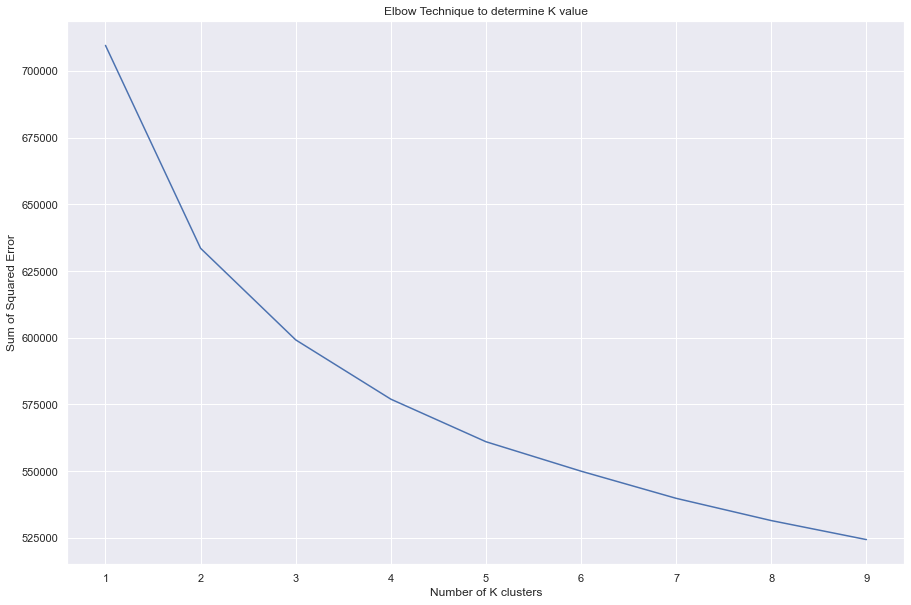

In [391]:
x = data_sample.loc[:,'EXT1':'OPN10']
k = range(1,10)
sse=[]
for i in k:
    km = KMeans(n_clusters=i, random_state=0).fit(x)
    sse.append(km.inertia_)
    
plt.plot(k, sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum of Squared Error');
plt.title('Elbow Technique to determine K value');

In [392]:
x = data_sample_analysis.loc[:,'EXT1':'OPN10']
data_sample_analysis['clusters'] = KMeans(n_clusters=3, random_state=42).fit_predict(x)

In [393]:
data_sample_analysis

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,clusters
105220,2.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,2.0,3.0,...,4.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,US,1
489562,5.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,3.0,...,4.0,2.0,4.0,2.0,3.0,2.0,4.0,4.0,AE,2
191194,4.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,...,5.0,3.0,3.0,1.0,5.0,4.0,4.0,3.0,NO,2
272525,3.0,4.0,3.0,4.0,3.0,2.0,5.0,3.0,4.0,3.0,...,4.0,2.0,3.0,2.0,4.0,3.0,5.0,3.0,CA,1
342581,5.0,4.0,2.0,4.0,4.0,1.0,1.0,1.0,5.0,4.0,...,4.0,2.0,4.0,2.0,5.0,3.0,5.0,5.0,US,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324984,3.0,1.0,4.0,2.0,3.0,2.0,3.0,5.0,1.0,4.0,...,4.0,2.0,4.0,1.0,4.0,4.0,5.0,4.0,GB,2
93775,3.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,...,2.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,US,0
829623,4.0,3.0,3.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,...,1.0,3.0,3.0,4.0,4.0,4.0,5.0,2.0,US,0
603880,3.0,2.0,3.0,2.0,4.0,2.0,2.0,3.0,5.0,4.0,...,5.0,2.0,5.0,1.0,4.0,5.0,5.0,4.0,US,2


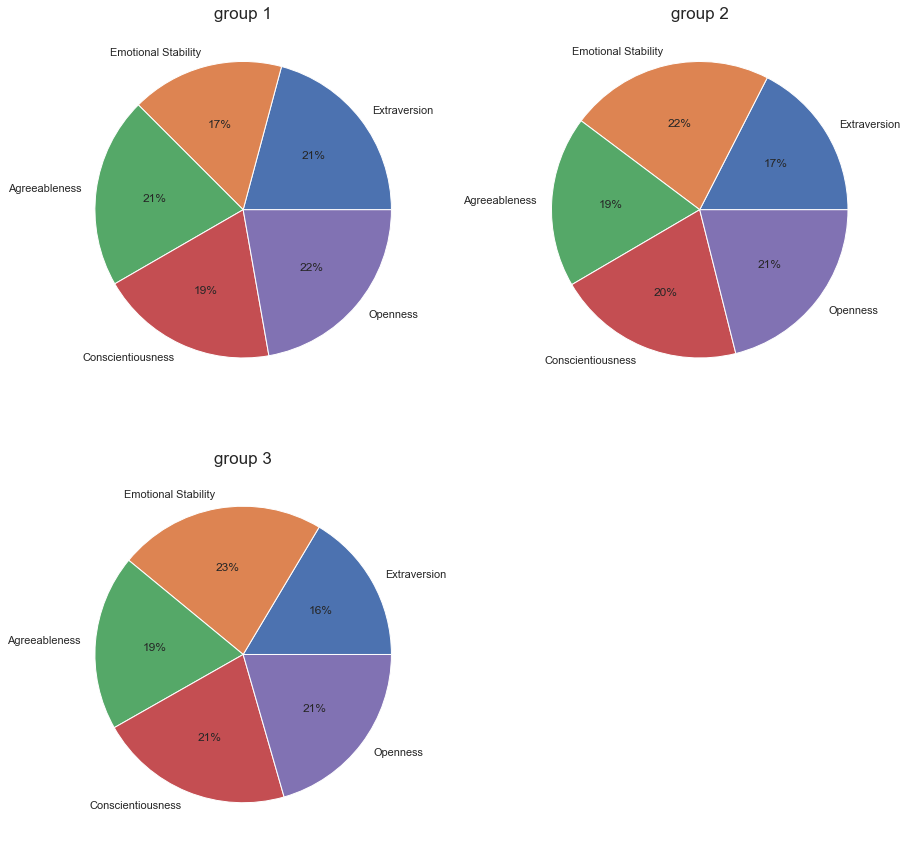

In [394]:
add_cluster_0 = []
cluster_0_temp = data_sample_analysis.loc[data_sample_analysis['clusters']==0]
n=0
j=10
for w in range(5):
    q=cluster_0_temp.iloc[:,n:j].mode().mode().mean().mean()
    add_cluster_0.append(q)
    n+=10
    j+=10
x = np.array([add_cluster_0]).reshape(-1,)


add_cluster_1 = []
cluster_1_temp = data_sample_analysis.loc[data_sample_analysis['clusters']==1]
n=0
j=10
for w in range(5):
    a=cluster_1_temp.iloc[:,n:j].mode().mode().mean().mean()
    #a = data_sample_analysis.iloc[1,n:j].mode().mode().mean()
    add_cluster_1.append(a)
    n+=10
    j+=10
y = np.array([add_cluster_1]).reshape(-1,)


add_cluster_2 = []
cluster_2_temp = data_sample_analysis.loc[data_sample_analysis['clusters']==2]
n=0
j=9
for w in range(5):
    s=cluster_1_temp.iloc[:,n:j].mode().mode().mean().mean()
    #s = data_sample_analysis.iloc[2,n:j].mode().mode().mean()
    add_cluster_2.append(s)
    n+=10
    j+=10
z = np.array([add_cluster_2]).reshape(-1,)


fig=plt.gcf()
fig.set_size_inches(15,15)

plot=1
group = ['group 1', 'group 2', 'group 3']
chart = [x,y,z]
for g, c in zip(group, chart):
    labels=['Extraversion','Emotional Stability','Agreeableness','Conscientiousness','Openness']
    plt.subplot(2,2,plot)
    plt.pie(c, autopct='%1.0f%%', labels=labels);
    plt.title(f"{g}", fontsize=17)
    plot+=1
    

In [395]:
# compute the sum of every personality trait and assign to new dataframe

data_sample_analysis['extraversion']=data_sample_analysis.loc[:,'EXT1':'EXT10'].sum(axis=1)
data_sample_analysis['emotional_stability']=data_sample_analysis.loc[:,'EST1':'EST10'].sum(axis=1)
data_sample_analysis['aggreableness']=data_sample_analysis.loc[:,'AGR1':'AGR10'].sum(axis=1)
data_sample_analysis['conscientiousness']=data_sample_analysis.loc[:,'CSN1':'CSN10'].sum(axis=1)
data_sample_analysis['openness']=data_sample_analysis.loc[:,'OPN1':'OPN10'].sum(axis=1)

data_sample_summary = data_sample_analysis.loc[:,'country':'openness']

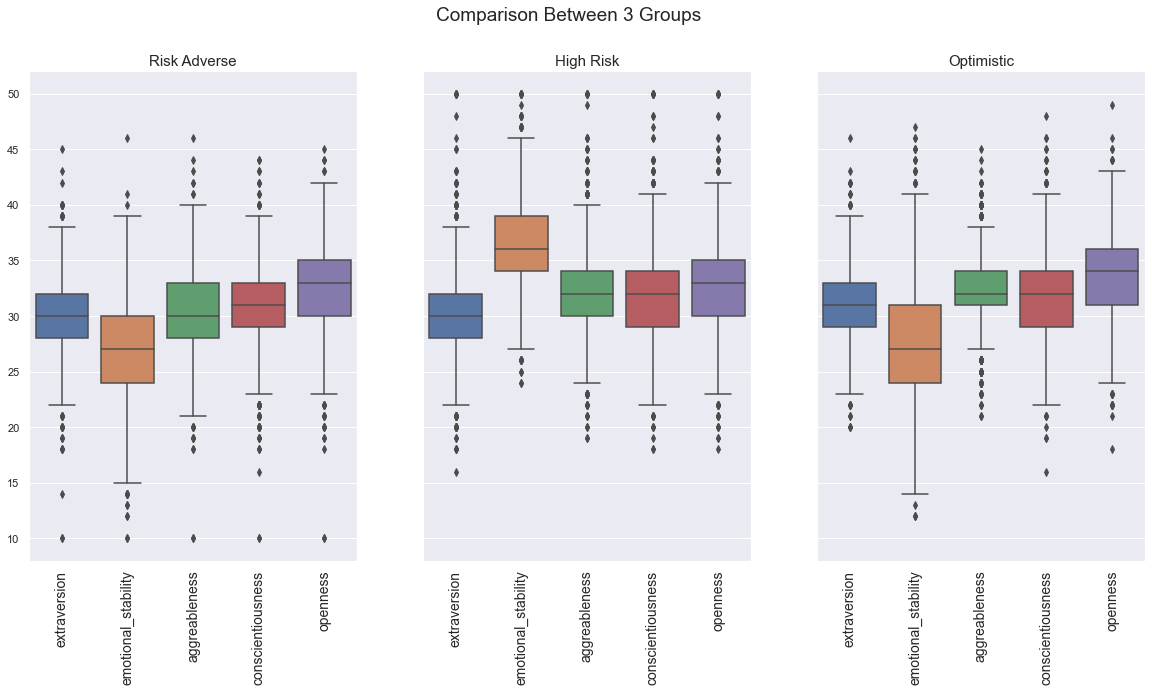

In [446]:
cluster_0 = data_sample_summary.loc[data_sample_summary['clusters']==0, 'extraversion':'openness']
cluster_1 = data_sample_summary.loc[data_sample_summary['clusters']==1, 'extraversion':'openness']
cluster_2 = data_sample_summary.loc[data_sample_summary['clusters']==2, 'extraversion':'openness']

cluster_n = [cluster_0,cluster_1,cluster_2]
group = ['Risk Adverse','High Risk', 'Optimistic']

fig, axes = plt.subplots(1,3, figsize=(20,9), sharey=True);
fig.suptitle('Comparison Between 3 Groups', fontsize=19);

h=0
for i, j in zip(cluster_n, group):
    ax = sns.boxplot(ax=axes[h], data=i)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=14);
    ax.set_title(j, fontsize=15);
    h+=1


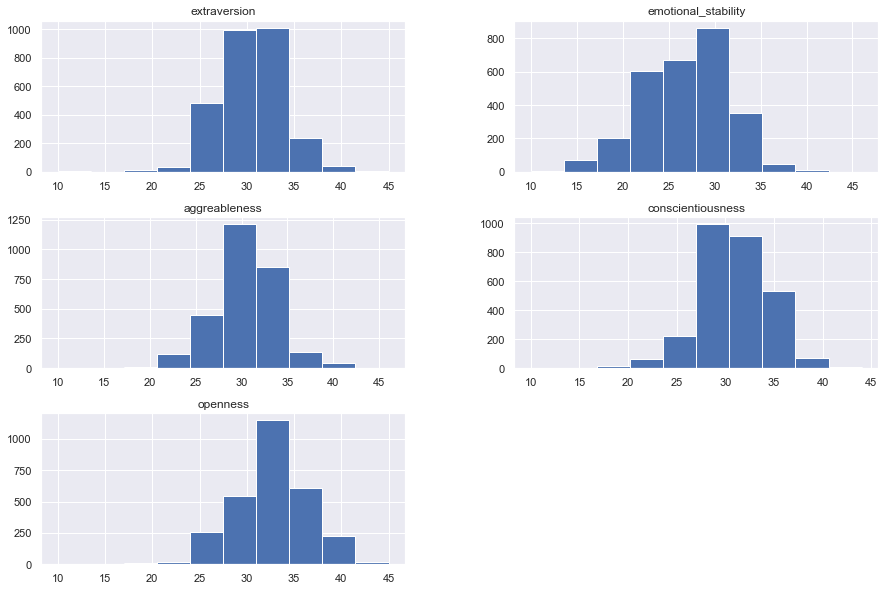

In [397]:
cluster_0.hist();  # not so extroverted, but conscientious, innovative and adaptable, relatively stable

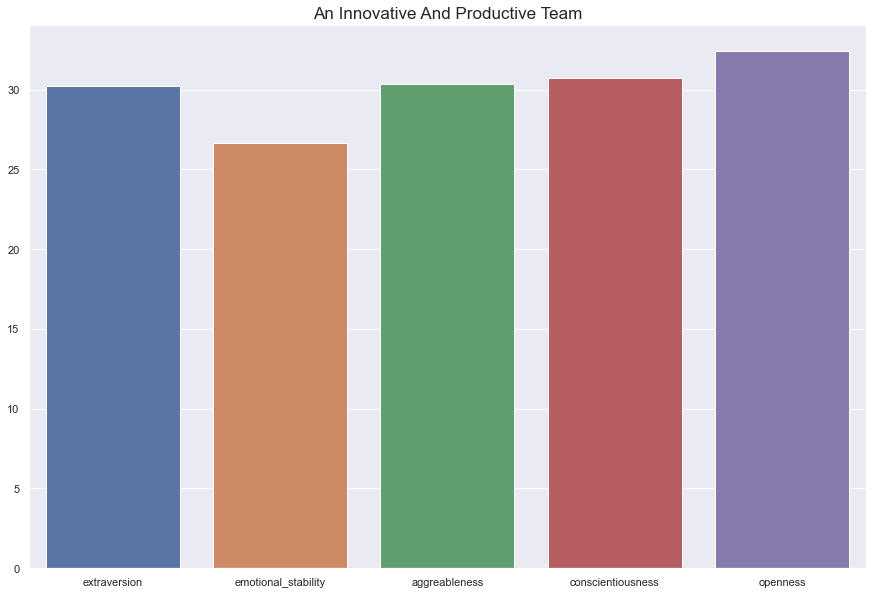

In [416]:
# comparing all the personal traits in clustor 0

sns.barplot(data=cluster_0, ci=None);
plt.title('An Innovative And Productive Team', fontsize=17);

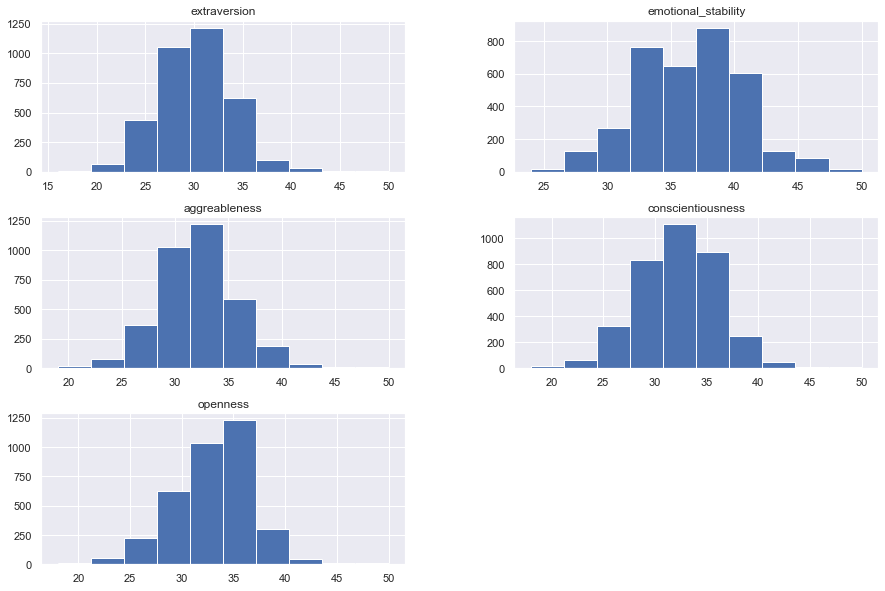

In [399]:
cluster_1.hist(); # highly extravert, highly unstable, very conscientious, very innovative

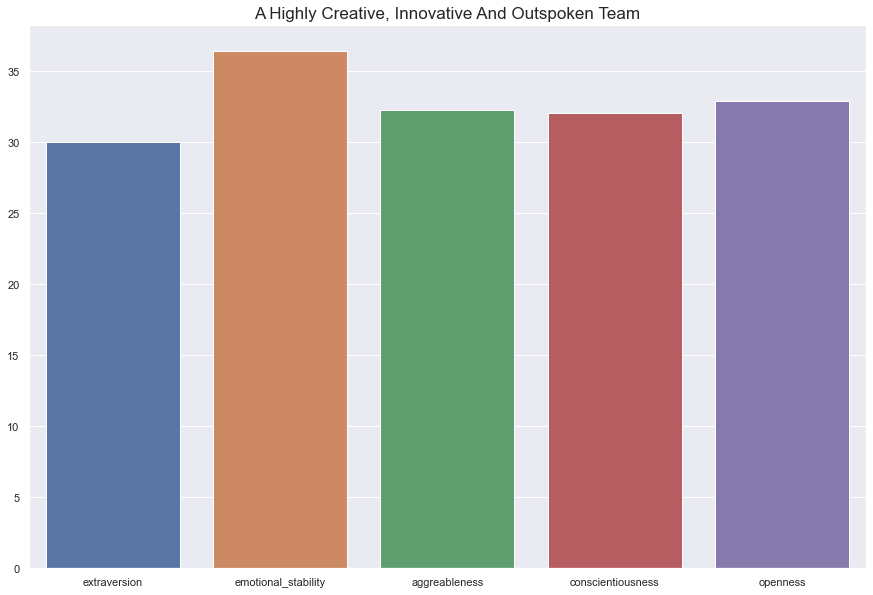

In [415]:
# comparing all the personal traits in clustor 1

sns.barplot(data=cluster_1, ci=None);
plt.title('A Highly Creative, Innovative And Outspoken Team', fontsize=17);

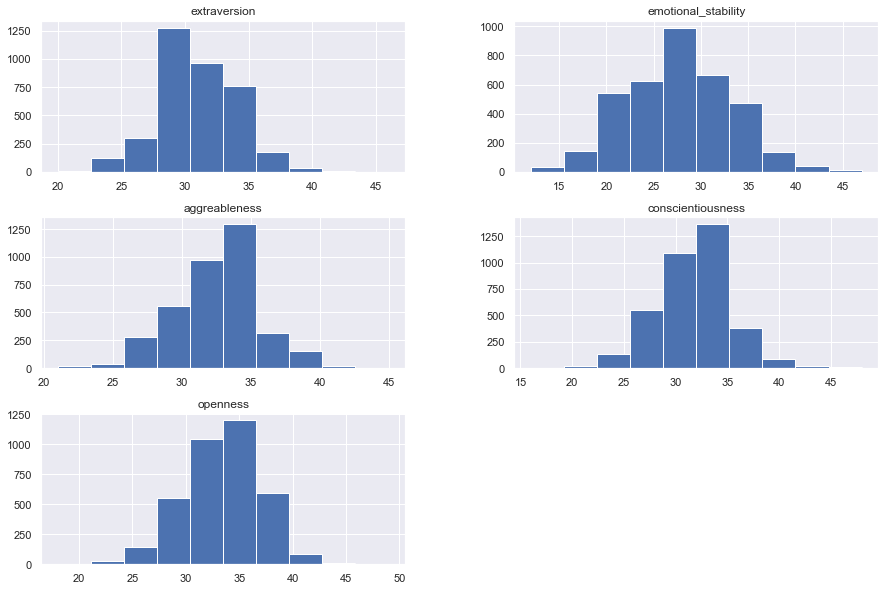

In [401]:
cluster_2.hist(); # highly unstable, less cohesive, less conscientious, not so extravert, but innovative

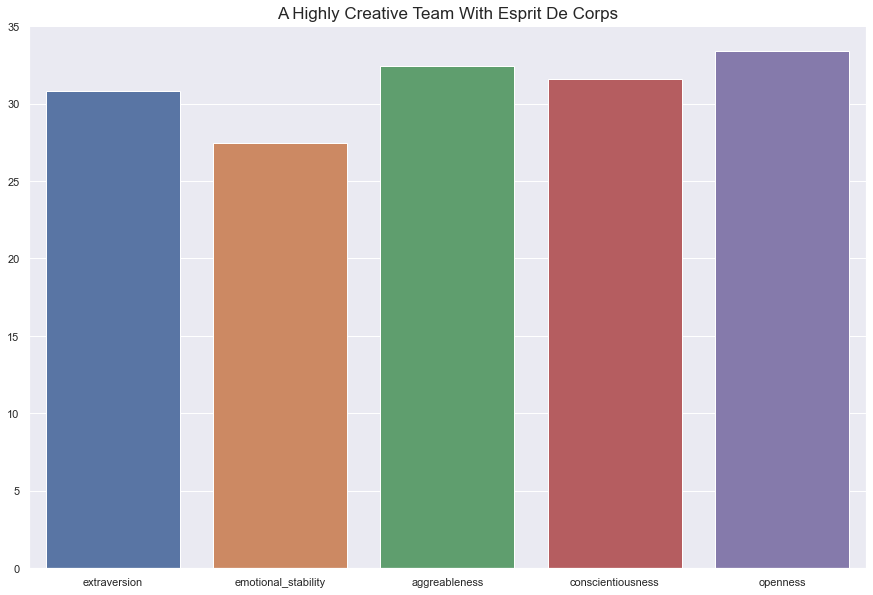

In [419]:
# comparing all the personal traits in clustor 2

sns.barplot(data=cluster_2, ci=None);
plt.title('A Highly Creative Team With Esprit De Corps', fontsize=17);

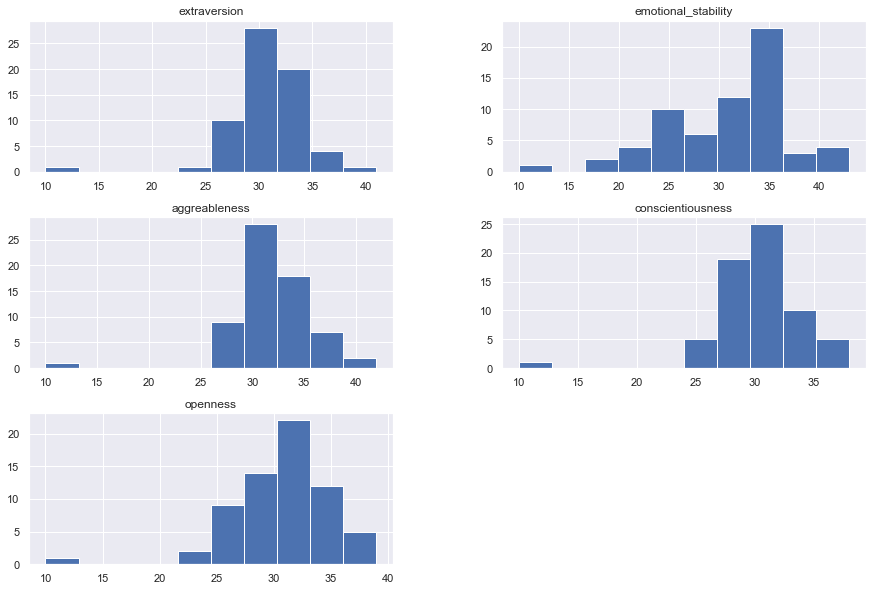

In [405]:
# personality traits for Singapore

asia.loc[asia['country']=='SG'].hist(); 

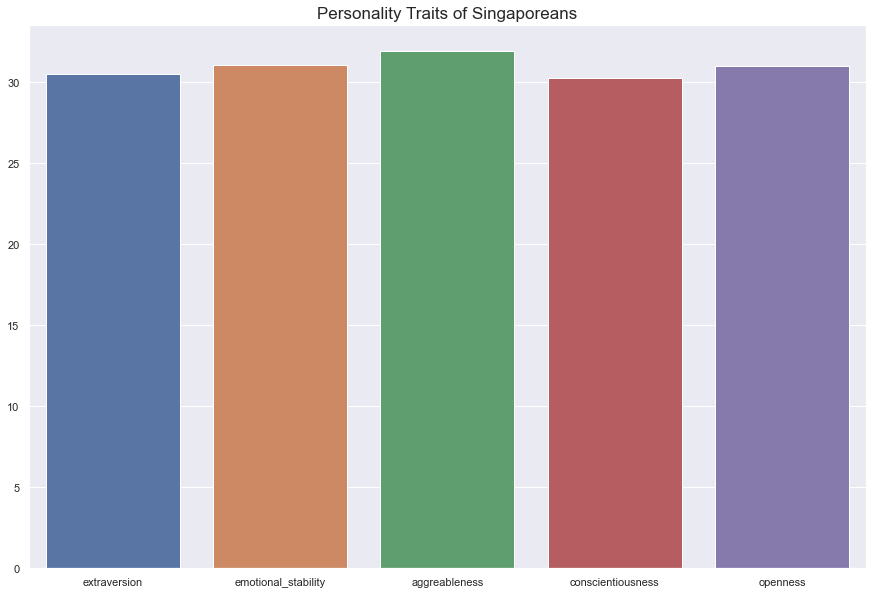

In [411]:
# a snapshot of Singaporean personality traits and comparison

sns.barplot(data=asia.loc[asia['country']=='SG'], ci=None);
plt.title('Personality Traits of Singaporeans', fontsize=17);